In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('OUT 1-3 data(standard-transformed).csv')
df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),Coronavirus Cases,A,B,C
0,Brazil,BRA,-0.178534,0.190525,3.487321,59324,0.0,1.0,0.0
1,Switzerland,CHE,0.049736,-0.430016,-0.518329,29061,0.0,1.0,0.0
2,Germany,DEU,0.152279,-0.198667,-0.369352,156727,1.0,0.0,0.0
3,Denmark,DNK,-0.163517,-0.440522,-0.517006,8575,0.0,1.0,0.0
4,Spain,ESP,-0.904317,-0.311464,-0.296492,223759,1.0,0.0,0.0
5,France,FRA,-0.539019,-0.247778,-0.273693,161488,1.0,0.0,0.0
6,Japan,JPN,-0.998588,-0.060637,-0.361811,13231,0.0,1.0,0.0
7,Greece,GRC,-1.501657,-0.422622,-0.475288,2506,0.0,0.0,1.0
8,Iran,IRN,0.112651,-0.206110,0.246937,90481,0.0,0.0,0.0
9,Kuwait,KWT,1.673410,-0.443467,-0.522367,3075,0.0,0.0,1.0


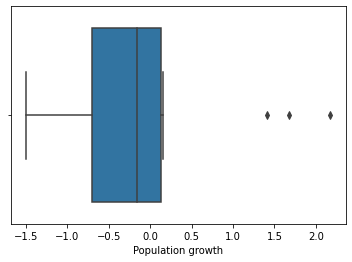

In [3]:
sns.boxplot(x=df['Population growth'])

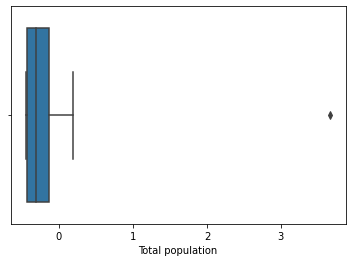

In [4]:
sns.boxplot(x=df['Total population'])

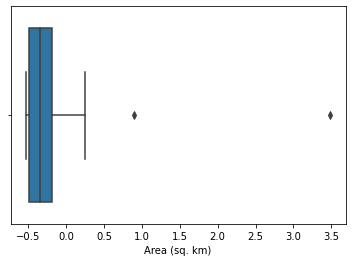

In [5]:
sns.boxplot(x=df['Area (sq. km)'])

In [6]:
column123 = df[['Population growth','Total population','Area (sq. km)']].copy()
column123

,Population growth,Total population,Area (sq. km)
0,-0.178534,0.190525,3.487321
1,0.049736,-0.430016,-0.518329
2,0.152279,-0.198667,-0.369352
3,-0.163517,-0.440522,-0.517006
4,-0.904317,-0.311464,-0.296492
5,-0.539019,-0.247778,-0.273693
6,-0.998588,-0.060637,-0.361811
7,-1.501657,-0.422622,-0.475288
8,0.112651,-0.206110,0.246937
9,1.673410,-0.443467,-0.522367


In [7]:
Q1=column123.quantile(0.25)
Q1

Population growth   -0.697758
Total population    -0.427632
Area (sq. km)       -0.496147
Name: 0.25, dtype: float64

In [8]:
Q3=column123.quantile(0.75)
Q3

Population growth    0.132465
Total population    -0.129652
Area (sq. km)       -0.186244
Name: 0.75, dtype: float64

In [9]:
IQR=Q3-Q1
IQR

Population growth    0.830223
Total population     0.297980
Area (sq. km)        0.309903
dtype: float64

In [10]:
(column123<Q1-1.5*IQR) | (column123>Q3+1.5*IQR)

,Population growth,Total population,Area (sq. km)
0,False,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,True,False,False


In [11]:
new123=column123[((column123>=Q1-1.5*IQR) & (column123<=Q3+1.5*IQR)).all(axis=1)]
new123

,Population growth,Total population,Area (sq. km)
1,0.049736,-0.430016,-0.518329
2,0.152279,-0.198667,-0.369352
3,-0.163517,-0.440522,-0.517006
4,-0.904317,-0.311464,-0.296492
5,-0.539019,-0.247778,-0.273693
6,-0.998588,-0.060637,-0.361811
7,-1.501657,-0.422622,-0.475288
8,0.112651,-0.206110,0.246937
10,-0.856497,-0.346237,-0.322451
13,-0.538479,-0.425249,-0.341226


In [12]:
new_df1 = df.drop(['Population growth','Total population','Area (sq. km)'],inplace=False,axis=1)
new_df1 = new123.join(new_df1)
new_df1

,Population growth,Total population,Area (sq. km),CountryName,CountryCode,Coronavirus Cases,A,B,C
1,0.049736,-0.430016,-0.518329,Switzerland,CHE,29061,0.0,1.0,0.0
2,0.152279,-0.198667,-0.369352,Germany,DEU,156727,1.0,0.0,0.0
3,-0.163517,-0.440522,-0.517006,Denmark,DNK,8575,0.0,1.0,0.0
4,-0.904317,-0.311464,-0.296492,Spain,ESP,223759,1.0,0.0,0.0
5,-0.539019,-0.247778,-0.273693,France,FRA,161488,1.0,0.0,0.0
6,-0.998588,-0.060637,-0.361811,Japan,JPN,13231,0.0,1.0,0.0
7,-1.501657,-0.422622,-0.475288,Greece,GRC,2506,0.0,0.0,1.0
8,0.112651,-0.206110,0.246937,Iran,IRN,90481,0.0,0.0,0.0
10,-0.856497,-0.346237,-0.322451,Morocco,MAR,4047,0.0,0.0,1.0
13,-0.538479,-0.425249,-0.341226,Sweden,SWE,18640,0.0,0.0,1.0


In [13]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 13
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population growth  10 non-null     float64
 1   Total population   10 non-null     float64
 2   Area (sq. km)      10 non-null     float64
 3   CountryName        10 non-null     object 
 4   CountryCode        10 non-null     object 
 5   Coronavirus Cases  10 non-null     int64  
 6   A                  10 non-null     float64
 7   B                  10 non-null     float64
 8   C                  10 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ KB


In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
column123 = df[['Population growth','Total population','Area (sq. km)']].copy()
column123

,Population growth,Total population,Area (sq. km)
0,-0.178534,0.190525,3.487321
1,0.049736,-0.430016,-0.518329
2,0.152279,-0.198667,-0.369352
3,-0.163517,-0.440522,-0.517006
4,-0.904317,-0.311464,-0.296492
5,-0.539019,-0.247778,-0.273693
6,-0.998588,-0.060637,-0.361811
7,-1.501657,-0.422622,-0.475288
8,0.112651,-0.206110,0.246937
9,1.673410,-0.443467,-0.522367


In [16]:
transformer = RobustScaler()
new_col123 = pd.DataFrame(transformer.fit_transform(column123),columns=column123.columns)
new_col123

,Population growth,Total population,Area (sq. km)
0,-0.018087,1.684638,12.354018
1,0.256863,-0.397852,-0.571479
2,0.380375,0.378539,-0.090758
3,0.000000,-0.433110,-0.567212
4,-0.892290,0.000000,0.144348
5,-0.452290,0.213726,0.217916
6,-1.005839,0.841756,-0.066425
7,-1.611783,-0.373037,-0.432594
8,0.332643,0.353561,1.897892
9,2.212571,-0.442991,-0.584510


In [17]:
new_df2 = df.drop(['Population growth','Total population','Area (sq. km)'],inplace=False,axis=1)
new_df2 = new_col123.join(new_df2)
new_df2

,Population growth,Total population,Area (sq. km),CountryName,CountryCode,Coronavirus Cases,A,B,C
0,-0.018087,1.684638,12.354018,Brazil,BRA,59324,0.0,1.0,0.0
1,0.256863,-0.397852,-0.571479,Switzerland,CHE,29061,0.0,1.0,0.0
2,0.380375,0.378539,-0.090758,Germany,DEU,156727,1.0,0.0,0.0
3,0.000000,-0.433110,-0.567212,Denmark,DNK,8575,0.0,1.0,0.0
4,-0.892290,0.000000,0.144348,Spain,ESP,223759,1.0,0.0,0.0
5,-0.452290,0.213726,0.217916,France,FRA,161488,1.0,0.0,0.0
6,-1.005839,0.841756,-0.066425,Japan,JPN,13231,0.0,1.0,0.0
7,-1.611783,-0.373037,-0.432594,Greece,GRC,2506,0.0,0.0,1.0
8,0.332643,0.353561,1.897892,Iran,IRN,90481,0.0,0.0,0.0
9,2.212571,-0.442991,-0.584510,Kuwait,KWT,3075,0.0,0.0,1.0


In [18]:
new_df2.mean()

Population growth        0.196956
Total population         1.045249
Area (sq. km)            1.101072
Coronavirus Cases    53953.333333
A                        0.200000
B                        0.400000
C                        0.266667
dtype: float64

In [19]:
new_df2.var()

Population growth    1.554439e+00
Total population     1.206668e+01
Area (sq. km)        1.115609e+01
Coronavirus Cases    5.075427e+09
A                    1.714286e-01
B                    2.571429e-01
C                    2.095238e-01
dtype: float64

In [20]:
df.mean()

Population growth    1.369275e-16
Total population     5.921189e-17
Area (sq. km)       -5.181041e-17
Coronavirus Cases    5.395333e+04
A                    2.000000e-01
B                    4.000000e-01
C                    2.666667e-01
dtype: float64

In [21]:
df.var()

Population growth    1.071429e+00
Total population     1.071429e+00
Area (sq. km)        1.071429e+00
Coronavirus Cases    5.075427e+09
A                    1.714286e-01
B                    2.571429e-01
C                    2.095238e-01
dtype: float64

In [22]:
df.to_csv('OUT 1-4 data(outlier_passed).csv', index=False)